In [1]:
# import libraries
# import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load

**Retain original columns using "clean_1", use "final" dataset to select index**

In [2]:
c1 = pd.read_parquet('data/clean_1/game_stats_2023-09-19.parquet')
c1.shape

(1604, 37)

In [3]:
c1.columns

Index(['game', 'date', 'tz', 'location', 'week', 'home', 'away', 'home_score',
       'away_score', 'away_completions', 'away_throws', 'away_hucks_completed',
       'away_hucks', 'away_blocks', 'away_turnovers', 'away_o_scores',
       'away_o_points', 'away_o_possessions', 'away_d_scores', 'away_d_points',
       'away_d_possessions', 'away_rz_scores', 'away_rz_possessions',
       'home_completions', 'home_throws', 'home_hucks_completed', 'home_hucks',
       'home_blocks', 'home_turnovers', 'home_o_scores', 'home_o_points',
       'home_o_possessions', 'home_d_scores', 'home_d_points',
       'home_d_possessions', 'home_rz_scores', 'home_rz_possessions'],
      dtype='object')

In [4]:
c2 = pd.read_parquet('data/game_stats_0.parquet')
c2.shape

(1428, 45)

In [277]:
c2.columns

Index(['game', 'date', 'week', 'home', 'away', 'home_score', 'away_score',
       'away_completions', 'away_throws', 'away_blocks', 'away_turnovers',
       'away_o_scores', 'away_o_points', 'away_o_possessions', 'away_d_scores',
       'away_d_points', 'away_d_possessions', 'home_completions',
       'home_throws', 'home_blocks', 'home_turnovers', 'home_o_scores',
       'home_o_points', 'home_o_possessions', 'home_d_scores', 'home_d_points',
       'home_d_possessions', 'home_win', 'home_margin', 'home_completion_rate',
       'away_completion_rate', 'home_block_rate', 'away_block_rate',
       'away_throw_per_score', 'home_throw_per_score', 'home_hold_rate',
       'away_hold_rate', 'home_o_poss_per_hold', 'away_o_poss_per_hold',
       'home_break_rate', 'away_break_rate', 'home_d_poss_per_pt',
       'away_d_poss_per_pt', 'home_break_per_poss', 'away_break_per_poss'],
      dtype='object')

In [5]:
data = c1.loc[c2.index,:]

In [6]:
data.drop(columns = ['away_hucks_completed', 'away_hucks', 'away_rz_scores', 'away_rz_possessions',
                     'home_hucks_completed', 'home_hucks','home_rz_scores', 'home_rz_possessions',
                     'location', 'tz',], inplace=True)

In [280]:
del c1,c2

### Add Target

In [7]:
# could make win a multi-class: -1 for loss, 0 for tie, 1 for win
# currently just 1 for win, 0 for loss/tie
data.loc[:,'home_win'] = data.home_score > data.away_score
data.loc[:,'home_margin'] = data.home_score - data.away_score

In [20]:
data.sample(3).T

2123                       2285  \
game                       2014-05-31-MTL-TOR         2018-06-02-CHI-DET   
date                2014-05-31 19:00:00+00:00  2018-06-02 12:00:00+00:00   
week                                        8                         10   
home                                     Rush                   Mechanix   
away                                    Royal                      Union   
home_score                                 25                         18   
away_score                                 20                         25   
away_completions                          294                        196   
away_throws                               318                        225   
away_blocks                                10                         17   
away_turnovers                             24                         29   
away_o_scores                              15                         16   
away_o_points                              27                         20   
away_o_possessions                         33                         36   
away_d_scores                               5                          9   
away_d_points                              22                         27   
away_d_possessions                         13                         21   
home_completions                          237                        309   
home_throws                               254                        343   
home_blocks                                11                         12   
home_turnovers                             17                         34   
home_o_scores                              16                         16   
home_o_points                              22                         27   
home_o_possessions                         27                         37   
home_d_scores                               9                          2   
home_d_points                              27                         20   
home_d_possessions                         18                         18   
home_win                                 True                      False   
home_margin                                 5                         -7   

                                         1613  
game                       2016-05-27-IND-CIN  
date                2016-05-27 20:00:00+00:00  
week                                        9  
home                               Revolution  
away                                AlleyCats  
home_score                                 24  
away_score                                 28  
away_completions                          301  
away_throws                               323  
away_blocks                                14  
away_turnovers                             22  
away_o_scores                              22  
away_o_points                              26  
away_o_possessions                         35  
away_d_scores                               6  
away_d_points                              30  
away_d_possessions                         18  
home_completions                          257  
home_throws                               282  
home_blocks                                15  
home_turnovers                             25  
home_o_scores                              21  
home_o_points                              30  
home_o_possessions                         41  
home_d_scores                               3  
home_d_points                              26  
home_d_possessions                         11  
home_win                                False  
home_margin                                -4

In [8]:
# Correlation Table for target features
data.corr(numeric_only=True).iloc[-2:,2:-2].T.sort_values('home_margin').style\
        .background_gradient(cmap = 'PiYG', vmin=-1,vmax=1)\
        .format(formatter="{:.3f}")

### Remove Features directly result to/from Target

- **Remove**
  - scores
    - remove alltogether
  - points
    - could retain as denominator for engineered features, i.e.
      - possessions per point, throws per point
- **Keep**  
  - true stats to keep, engineer at will:
    - throws, completions, blocks, turnovers
    - possessions?

In [32]:
data.columns[data.columns.str.endswith('scores')]

Index(['away_o_scores', 'away_d_scores', 'home_o_scores', 'home_d_scores'], dtype='object')

In [9]:
data.drop(columns=data.columns[data.columns.str.endswith('scores')],inplace=True)

In [10]:
data.drop(columns=data.columns[data.columns.str.endswith('points')],inplace=True)

In [15]:
# data.drop(columns=data.columns[data.columns.str.endswith('possessions')],inplace=True)

In [222]:
# Correlation Table for target features
data.corr(numeric_only=True).iloc[-2:,2:-2].T.sort_values('home_margin').style\
        .background_gradient(cmap = 'PiYG', vmin=-1,vmax=1)\
        .format(formatter="{:.3f}")

In [16]:
# Correlation Table for target features
data.corr(numeric_only=True).iloc[-2:,2:-2].T.sort_values('home_margin').style\
        .background_gradient(cmap = 'PiYG', vmin=-1,vmax=1)\
        .format(formatter="{:.3f}")

### Basic Model Tests

In [31]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler

In [223]:
X = data.iloc[:,7:]
X.drop(columns=['home_win','home_margin'], inplace=True)
X.drop(columns=data.columns[data.columns.str.endswith('possessions')], inplace=True)
features = X.columns
margin = data.home_margin
win = data.home_win
X = StandardScaler().fit_transform(X)

In [224]:
margin_model = LinearRegression().fit(X,margin)
win_model = LogisticRegression().fit(X,win)

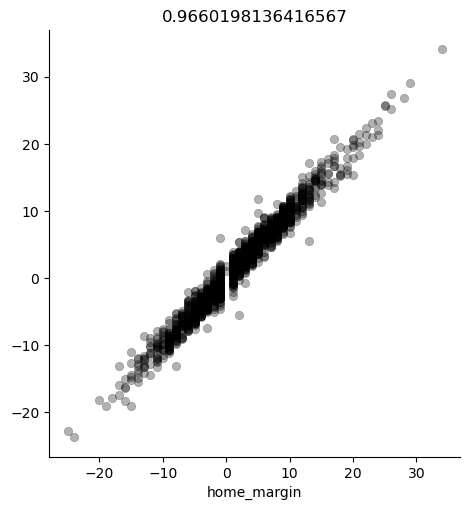

In [225]:
sns.relplot(x=margin, y=margin_model.predict(X), 
            edgecolor='face',alpha=0.3, color='k')
plt.title(margin_model.score(X,margin))
plt.show()

In [227]:
pd.DataFrame(np.abs(margin_model.coef_), index=features).sort_values(0, ascending=False).head(10)

0
home_completions  2.590642e+14
home_throws       2.564953e+14
home_turnovers    3.919399e+13
away_completions  1.204600e+13
away_throws       1.170633e+13
away_turnovers    1.885079e+12
away_blocks       3.554688e-01
home_blocks       2.736816e-01

In [229]:
win_model.score(X,win)

0.9586834733893558

In [228]:
pd.DataFrame(np.abs(win_model.coef_), columns=features).T.sort_values(0,ascending=False).head(10)

0
away_turnovers    6.672407
home_turnovers    6.173513
away_blocks       0.725293
home_blocks       0.600694
away_completions  0.595636
home_completions  0.543039
away_throws       0.461544
home_throws       0.394872

### Engineer Features

#### Exploration

In [80]:
# Correlation Table for target features
data.corr(numeric_only=True).iloc[-2:,2:-2].T.sort_values('home_margin').style\
        .background_gradient(cmap = 'PiYG', vmin=-1,vmax=1)\
        .format(formatter="{:.3f}")

In [11]:
print('HOME')
print('completions')
print(data.home_margin.corr(data.home_completions))
print('throws')
print(data.home_margin.corr(data.home_throws))
print('comp %')
print(data.home_margin.corr(data.home_completions/data.home_throws))

print('\nAWAY')
print('completions')
print(data.home_margin.corr(data.away_completions))
print('throws')
print(data.home_margin.corr(data.away_throws))
print('comp %')
print(data.home_margin.corr(data.away_completions/data.away_throws))

print('\nRatio')
print('comp %')
print(data.home_margin.corr((data.home_completions/data.home_throws)/(data.away_completions/data.away_throws)))
print(data.home_margin.corr(((data.away_completions/data.away_throws)/data.home_completions/data.home_throws)))

HOME
completions
-0.02894448182349743
throws
-0.0898736638628973
comp %
0.19280427087820015

AWAY
completions
-0.024090465842354223
throws
0.06037269471638687
comp %
-0.29125872006762

Ratio
comp %
0.262620371509239
0.02486236997993485


In [12]:
print('HOME')
print('home turnovers')
print(data.home_margin.corr(data.home_turnovers))
print('away turnovers')
print(data.home_margin.corr(data.away_turnovers))
print('ratio')
print(data.home_margin.corr(data.home_turnovers/data.away_turnovers))
print('away over home')
print(data.home_margin.corr(data.away_turnovers/data.home_turnovers))

HOME
home turnovers
-0.3968387806679247
away turnovers
0.5288565622280698
ratio
-0.8974331993894852
away over home
0.8874963330614215


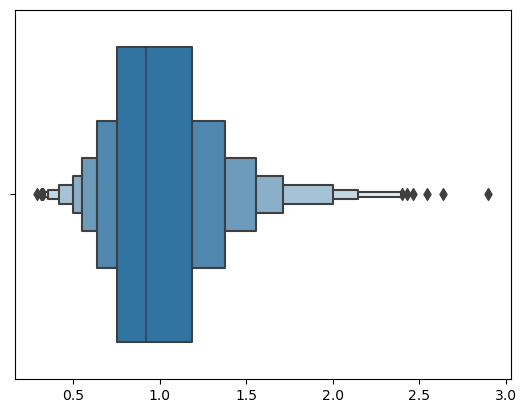

In [124]:
sns.boxenplot(x=data.home_turnovers/data.away_turnovers)
plt.show()

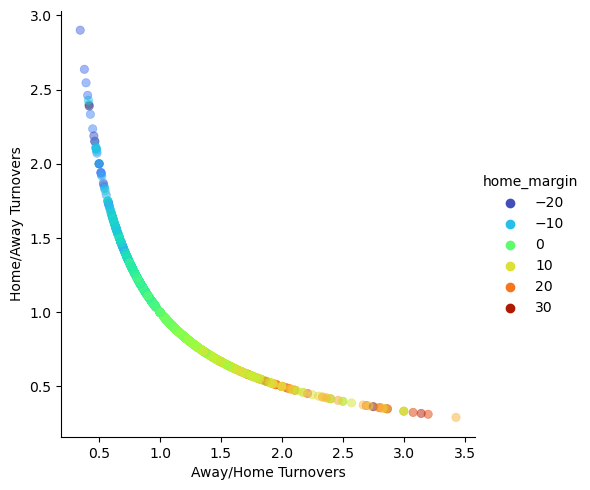

In [131]:
sns.relplot(x=data.away_turnovers/data.home_turnovers, y=data.home_turnovers/data.away_turnovers,
           hue=data.home_margin, edgecolor='face', alpha=0.5, palette='turbo')
plt.ylabel('Home/Away Turnovers')
plt.xlabel('Away/Home Turnovers')
plt.show()

In [13]:
# Correlation Table for target features
data.corr(numeric_only=True).iloc[-2:,2:-2].T.sort_values('home_margin').style\
        .background_gradient(cmap = 'PiYG', vmin=-1,vmax=1)\
        .format(formatter="{:.3f}")

In [151]:
print('HOME')
print('home d poss')
print(data.home_margin.corr(data.home_d_possessions))
print('home o poss')
print(data.home_margin.corr(data.home_o_possessions))
print('home d/o poss')
print(data.home_margin.corr(data.home_d_possessions/data.home_o_possessions))

print('\nAWAY')
print('away d poss')
print(data.home_margin.corr(data.away_d_possessions))
print('away o poss')
print(data.home_margin.corr(data.away_o_possessions))
print('away d/o poss')
print(data.home_margin.corr(data.away_d_possessions/data.away_o_possessions))

print('\nRatio')
print('home d / away d')
print(data.home_margin.corr(data.home_d_possessions/data.away_d_possessions))
print('home o / away o')
print(data.home_margin.corr(data.home_o_possessions/data.away_o_possessions))

HOME
home d poss
0.7528791348863957
home o poss
-0.6861922115930398
home d/o poss
0.8076729297279756

AWAY
away d poss
-0.6983437283390708
away o poss
0.7053000862310781
away d/o poss
-0.7582979497775696

Ratio
home d / away d
0.7253276886450652
home o / away o
-0.8465526408361342


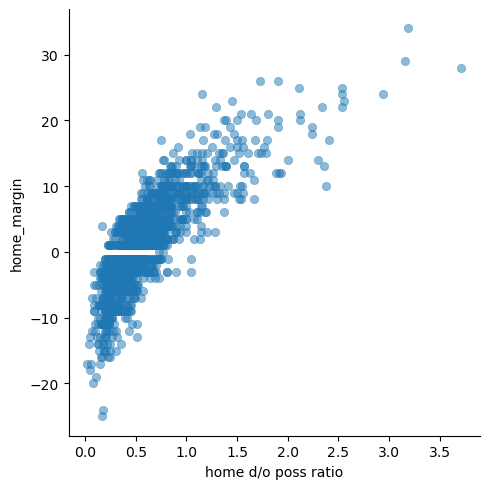

In [160]:
sns.relplot(x=data.home_d_possessions/data.home_o_possessions, y=data.home_margin, edgecolor='face', alpha=0.5)
plt.xlabel('home d/o poss ratio')
plt.show()

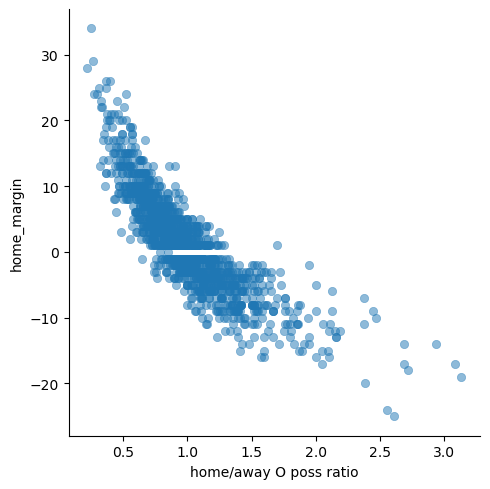

In [157]:
sns.relplot(x=data.home_o_possessions/data.away_o_possessions, y=data.home_margin, edgecolor='face', alpha=0.5)
plt.xlabel('home/away O poss ratio')
plt.show()

In [204]:
print('HOME')
print('home blocks')
print(data.home_margin.corr(data.home_blocks))
print('away turnovers')
print(data.home_margin.corr(data.away_turnovers))
print('sum')
print(data.home_margin.corr(data.home_blocks+data.away_turnovers))
print('product')
print(data.home_margin.corr(data.home_blocks*data.away_turnovers))

HOME
home blocks
0.5391820930239017
away turnovers
0.5288565622280698
sum
0.5605384369638307
product
0.5598103045975185


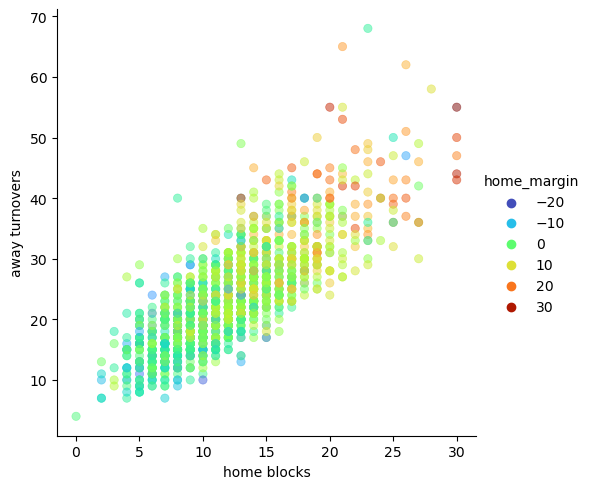

In [200]:
sns.relplot(x=data.home_blocks, y=data.away_turnovers, hue=data.home_margin, edgecolor='face', alpha=0.5, palette='turbo')
plt.xlabel('home blocks')
plt.ylabel('away turnovers')
plt.show()

In [241]:
data.home_margin.corr(data.home_turnovers)

-0.3968387806679247

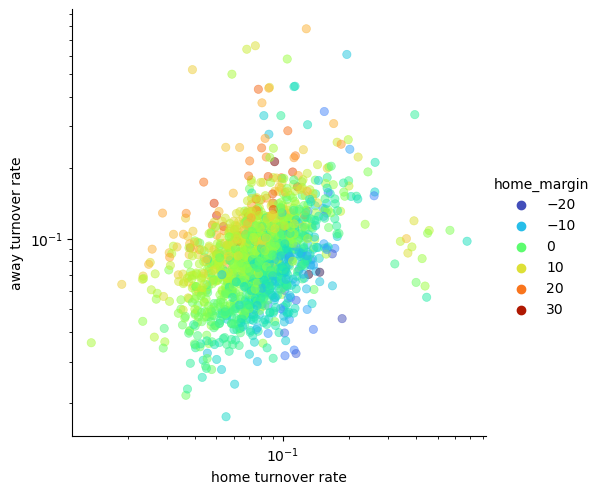

In [250]:
sns.relplot(x=data.home_turnovers/data.home_throws, y=data.away_turnovers/data.away_throws,
            hue=data.home_margin, edgecolor='face', alpha=0.5, palette='turbo')
plt.xlabel('home turnover rate')
plt.ylabel('away turnover rate')
plt.xscale('log')
plt.yscale('log')
plt.show()

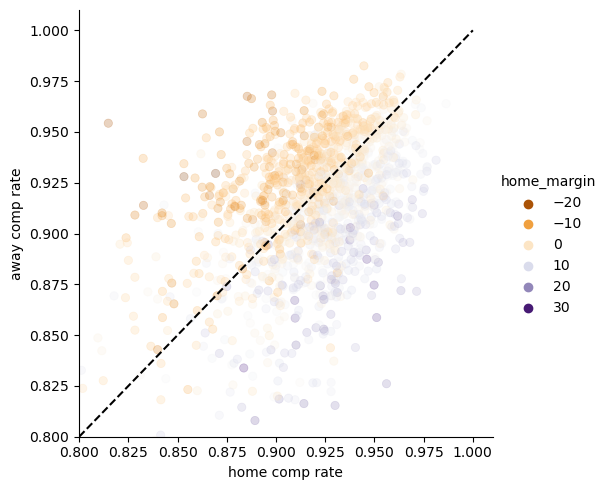

In [273]:
sns.relplot(x=data.home_completions/data.home_throws, y=data.away_completions/data.away_throws,
            hue=data.home_margin, edgecolor='face', alpha=0.25, palette='PuOr')
plt.xlabel('home comp rate')
plt.ylabel('away comp rate')
plt.plot([0.8,1],[0.8,1],'k--')
plt.xlim(0.8,1.01)

plt.ylim(0.8,1.01)
plt.show()

In [115]:
data.home_margin.corr(np.exp(data.home_blocks))

0.20746947197354004

In [101]:
data.home_margin.corr(data.away_turnovers/data.home_turnovers)

0.8874963330614215

In [93]:
data.home_margin.corr((data.home_completions/data.home_throws)/(data.away_completions/data.away_throws))

0.262620371509239

In [14]:
data.sample(2).T

1640                       2459
game                        2016-05-14-NY-TOR          2019-06-22-PHI-DC
date                2016-05-14 19:00:00+00:00  2019-06-22 16:00:00+00:00
week                                        7                         12
home                                     Rush                     Breeze
away                                   Empire                    Phoenix
home_score                                 22                         21
away_score                                 14                         18
away_completions                          184                        258
away_throws                               227                        277
away_blocks                                18                          8
away_turnovers                             43                         19
away_o_possessions                         40                         29
away_d_possessions                         20                         11
home_completions                          230                        254
home_throws                               264                        269
home_blocks                                16                         11
home_turnovers                             34                         15
home_o_possessions                         34                         28
home_d_possessions                         25                         11
home_win                                 True                       True
home_margin                                 8                          3

#### Feature Additions

In [20]:
# comp %
data['home_completion_rate'] = data.home_completions / data.home_throws
data['away_completion_rate'] = data.away_completions / data.away_throws

# comp % ratio
data['home-away_completion_rate_ratio'] = data.home_completion_rate/data.away_completion_rate
data['away-home_completion_rate_ratio'] = data.away_completion_rate/data.home_completion_rate

# turnover ratio
data['home-away_turnover_ratio'] = data.home_turnovers/data.away_turnovers
data['away-home_turnover_ratio'] = data.away_turnovers/data.home_turnovers

# possesion ratios
# data['home-away_o_pos_ratio'] = data.home_o_possessions/data.away_o_possessions
# data['away-home_o_pos_ratio'] = data.away_o_possessions/data.home_o_possessions
# data['home_o-d_pos_ratio'] = data.home_d_possessions/data.home_o_possessions
# data['away_o-d_pos_ratio'] = data.away_d_possessions/data.away_o_possessions

In [23]:
# basic reorder for easily reusing correlation table code
# drop and replace target features
data.drop(columns=['home_margin', 'home_win'],inplace=True)
data.loc[:,'home_win'] = data.home_score > data.away_score
data.loc[:,'home_margin'] = data.home_score - data.away_score

In [232]:
data.columns

Index(['game', 'date', 'week', 'home', 'away', 'home_score', 'away_score',
       'away_completions', 'away_throws', 'away_blocks', 'away_turnovers',
       'away_o_possessions', 'away_d_possessions', 'home_completions',
       'home_throws', 'home_blocks', 'home_turnovers', 'home_o_possessions',
       'home_d_possessions', 'home_completion_rate', 'away_completion_rate',
       'home-away_turnover_ratio', 'away-home_turnover_ratio',
       'home-away_o_pos_ratio', 'away-home_o_pos_ratio', 'home_o-d_pos_ratio',
       'away_o-d_pos_ratio', 'home_win', 'home_margin'],
      dtype='object')

In [24]:
# Correlation Table for target features
data.corr(numeric_only=True).iloc[-2:,2:-2].T.sort_values('home_margin').style\
        .background_gradient(cmap = 'PiYG', vmin=-1,vmax=1)\
        .format(formatter="{:.3f}")

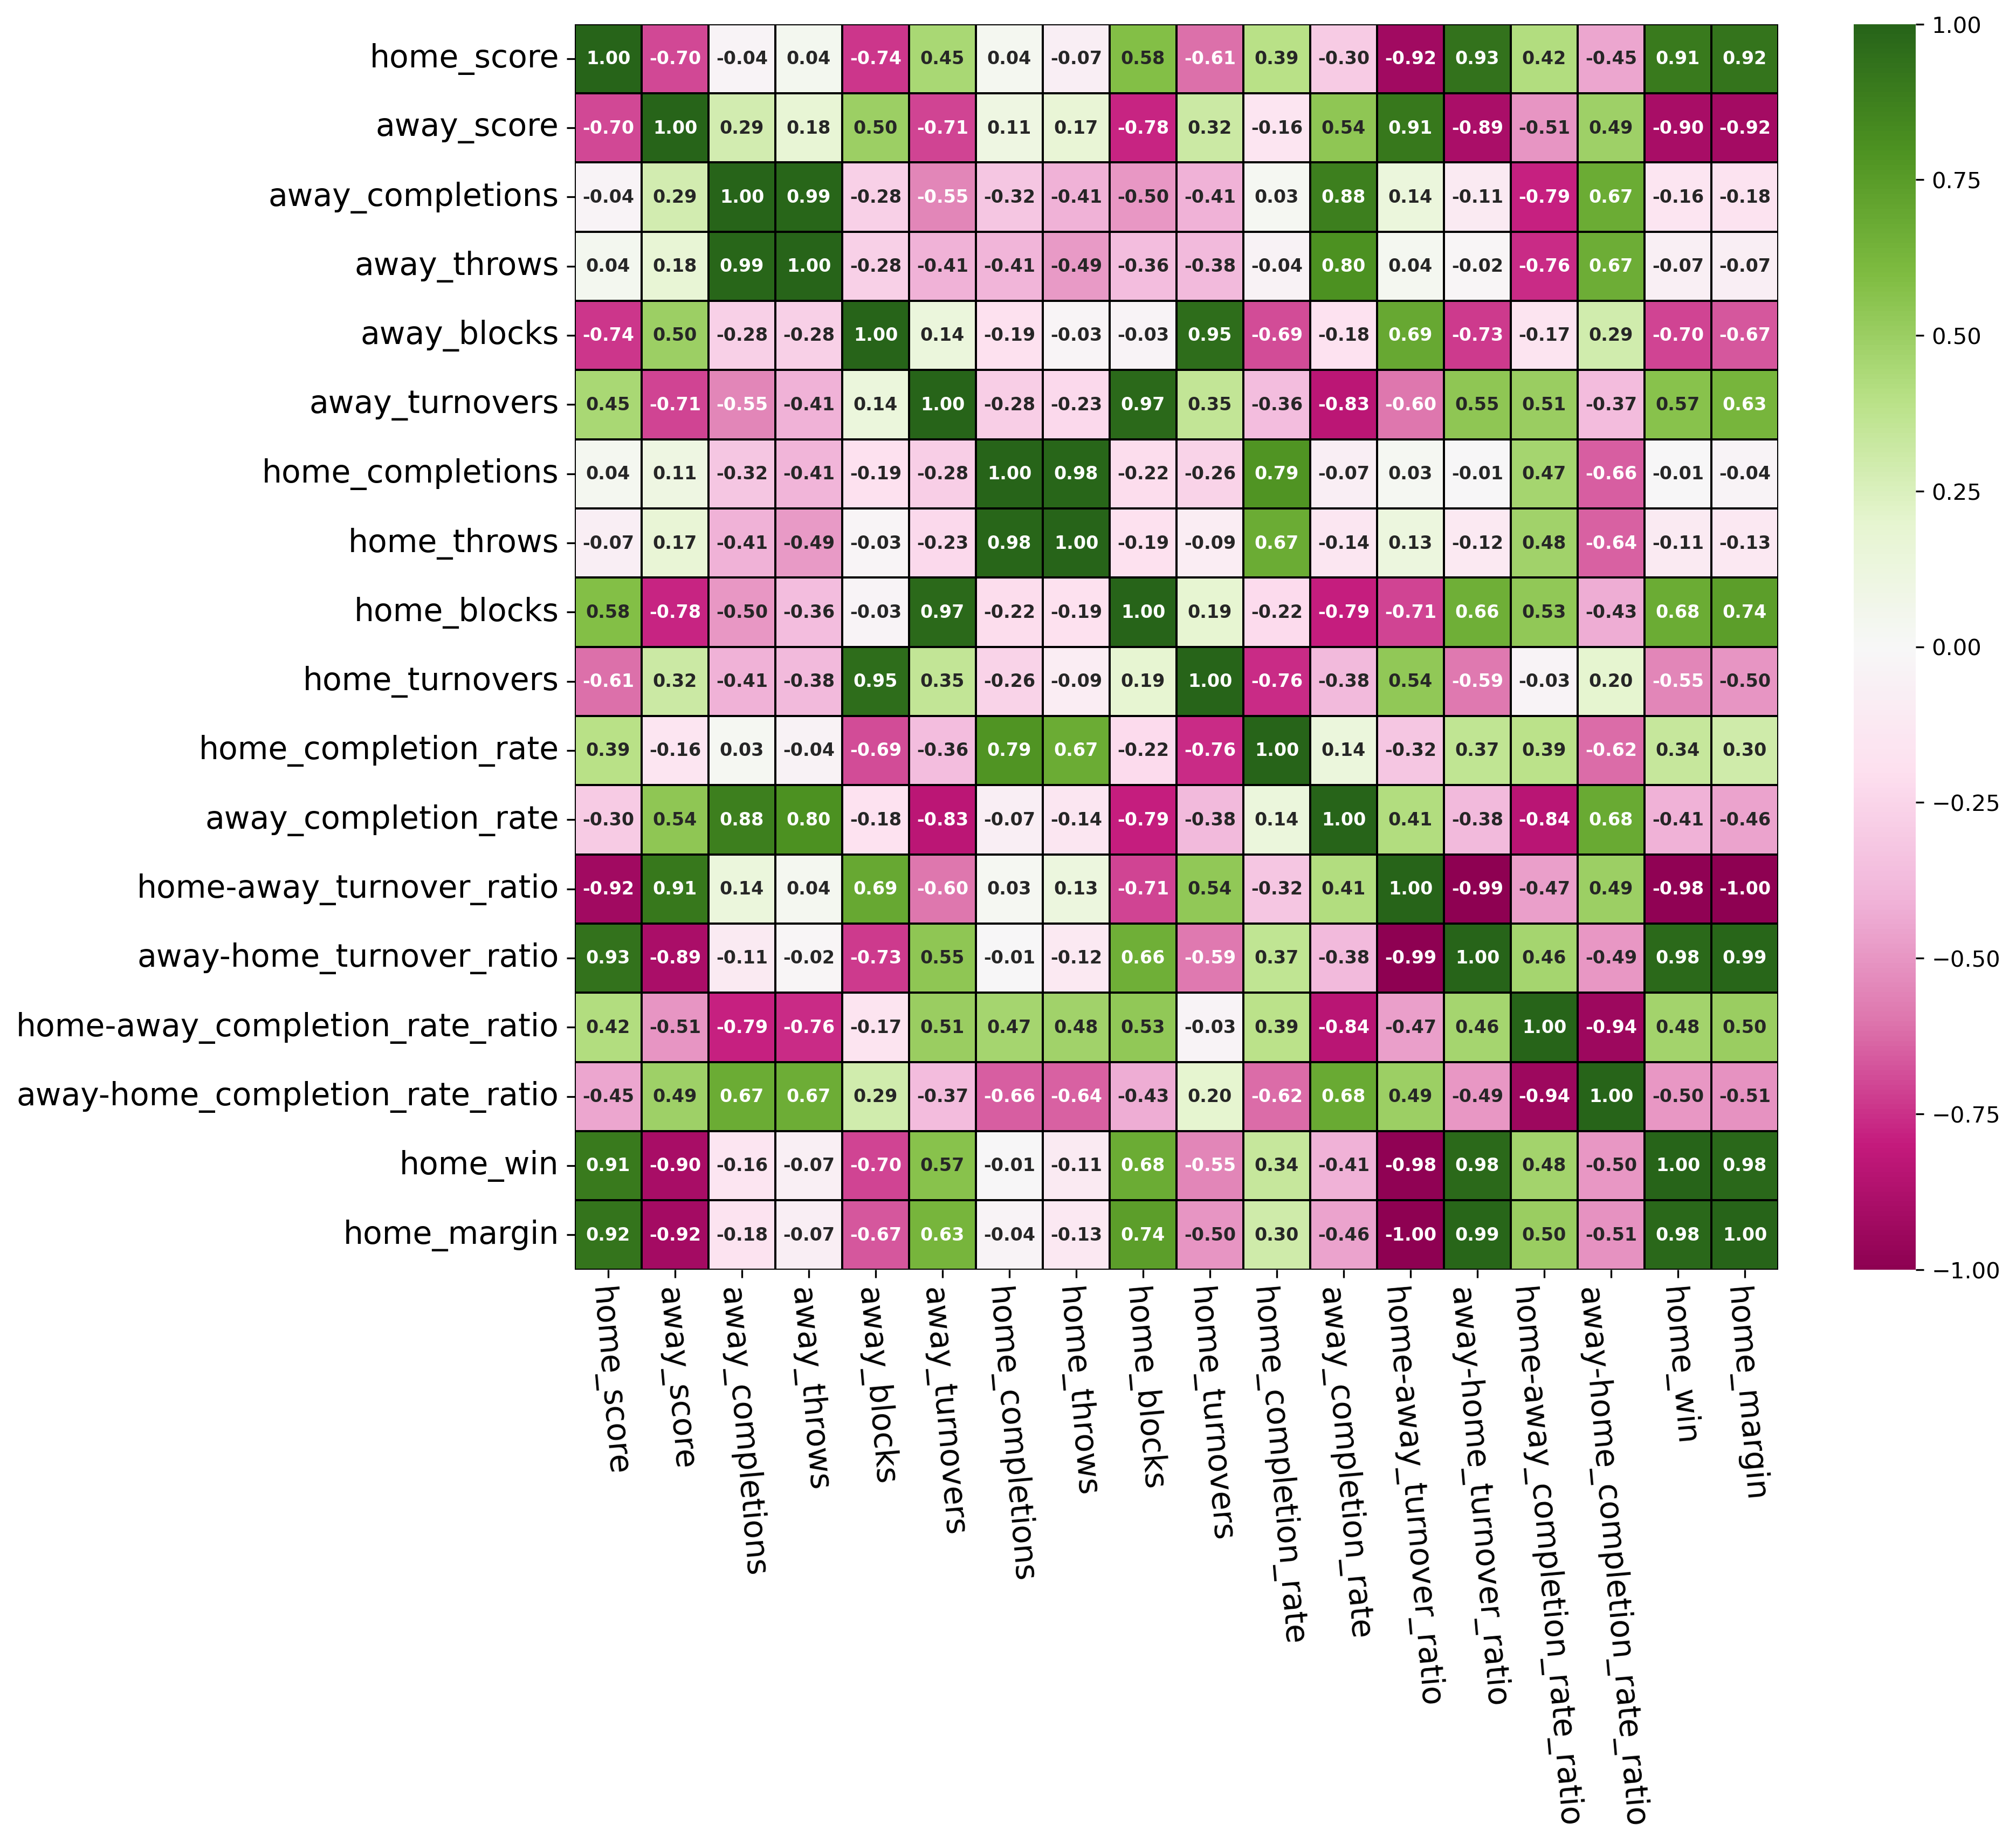

In [25]:
fig = plt.figure(figsize=(12,10), dpi=300)
sns.heatmap(data.corr(numeric_only=True).corr(), cmap='PiYG', linecolor='k', linewidths=0.5,
           vmin=-1, vmax=1,yticklabels=True, xticklabels=True,  fmt=".2f",
           annot=True, annot_kws=dict(fontsize=8,fontweight='bold'))
plt.tick_params(axis='x',labelrotation=-85)
plt.tick_params(axis='both',labelsize=14)

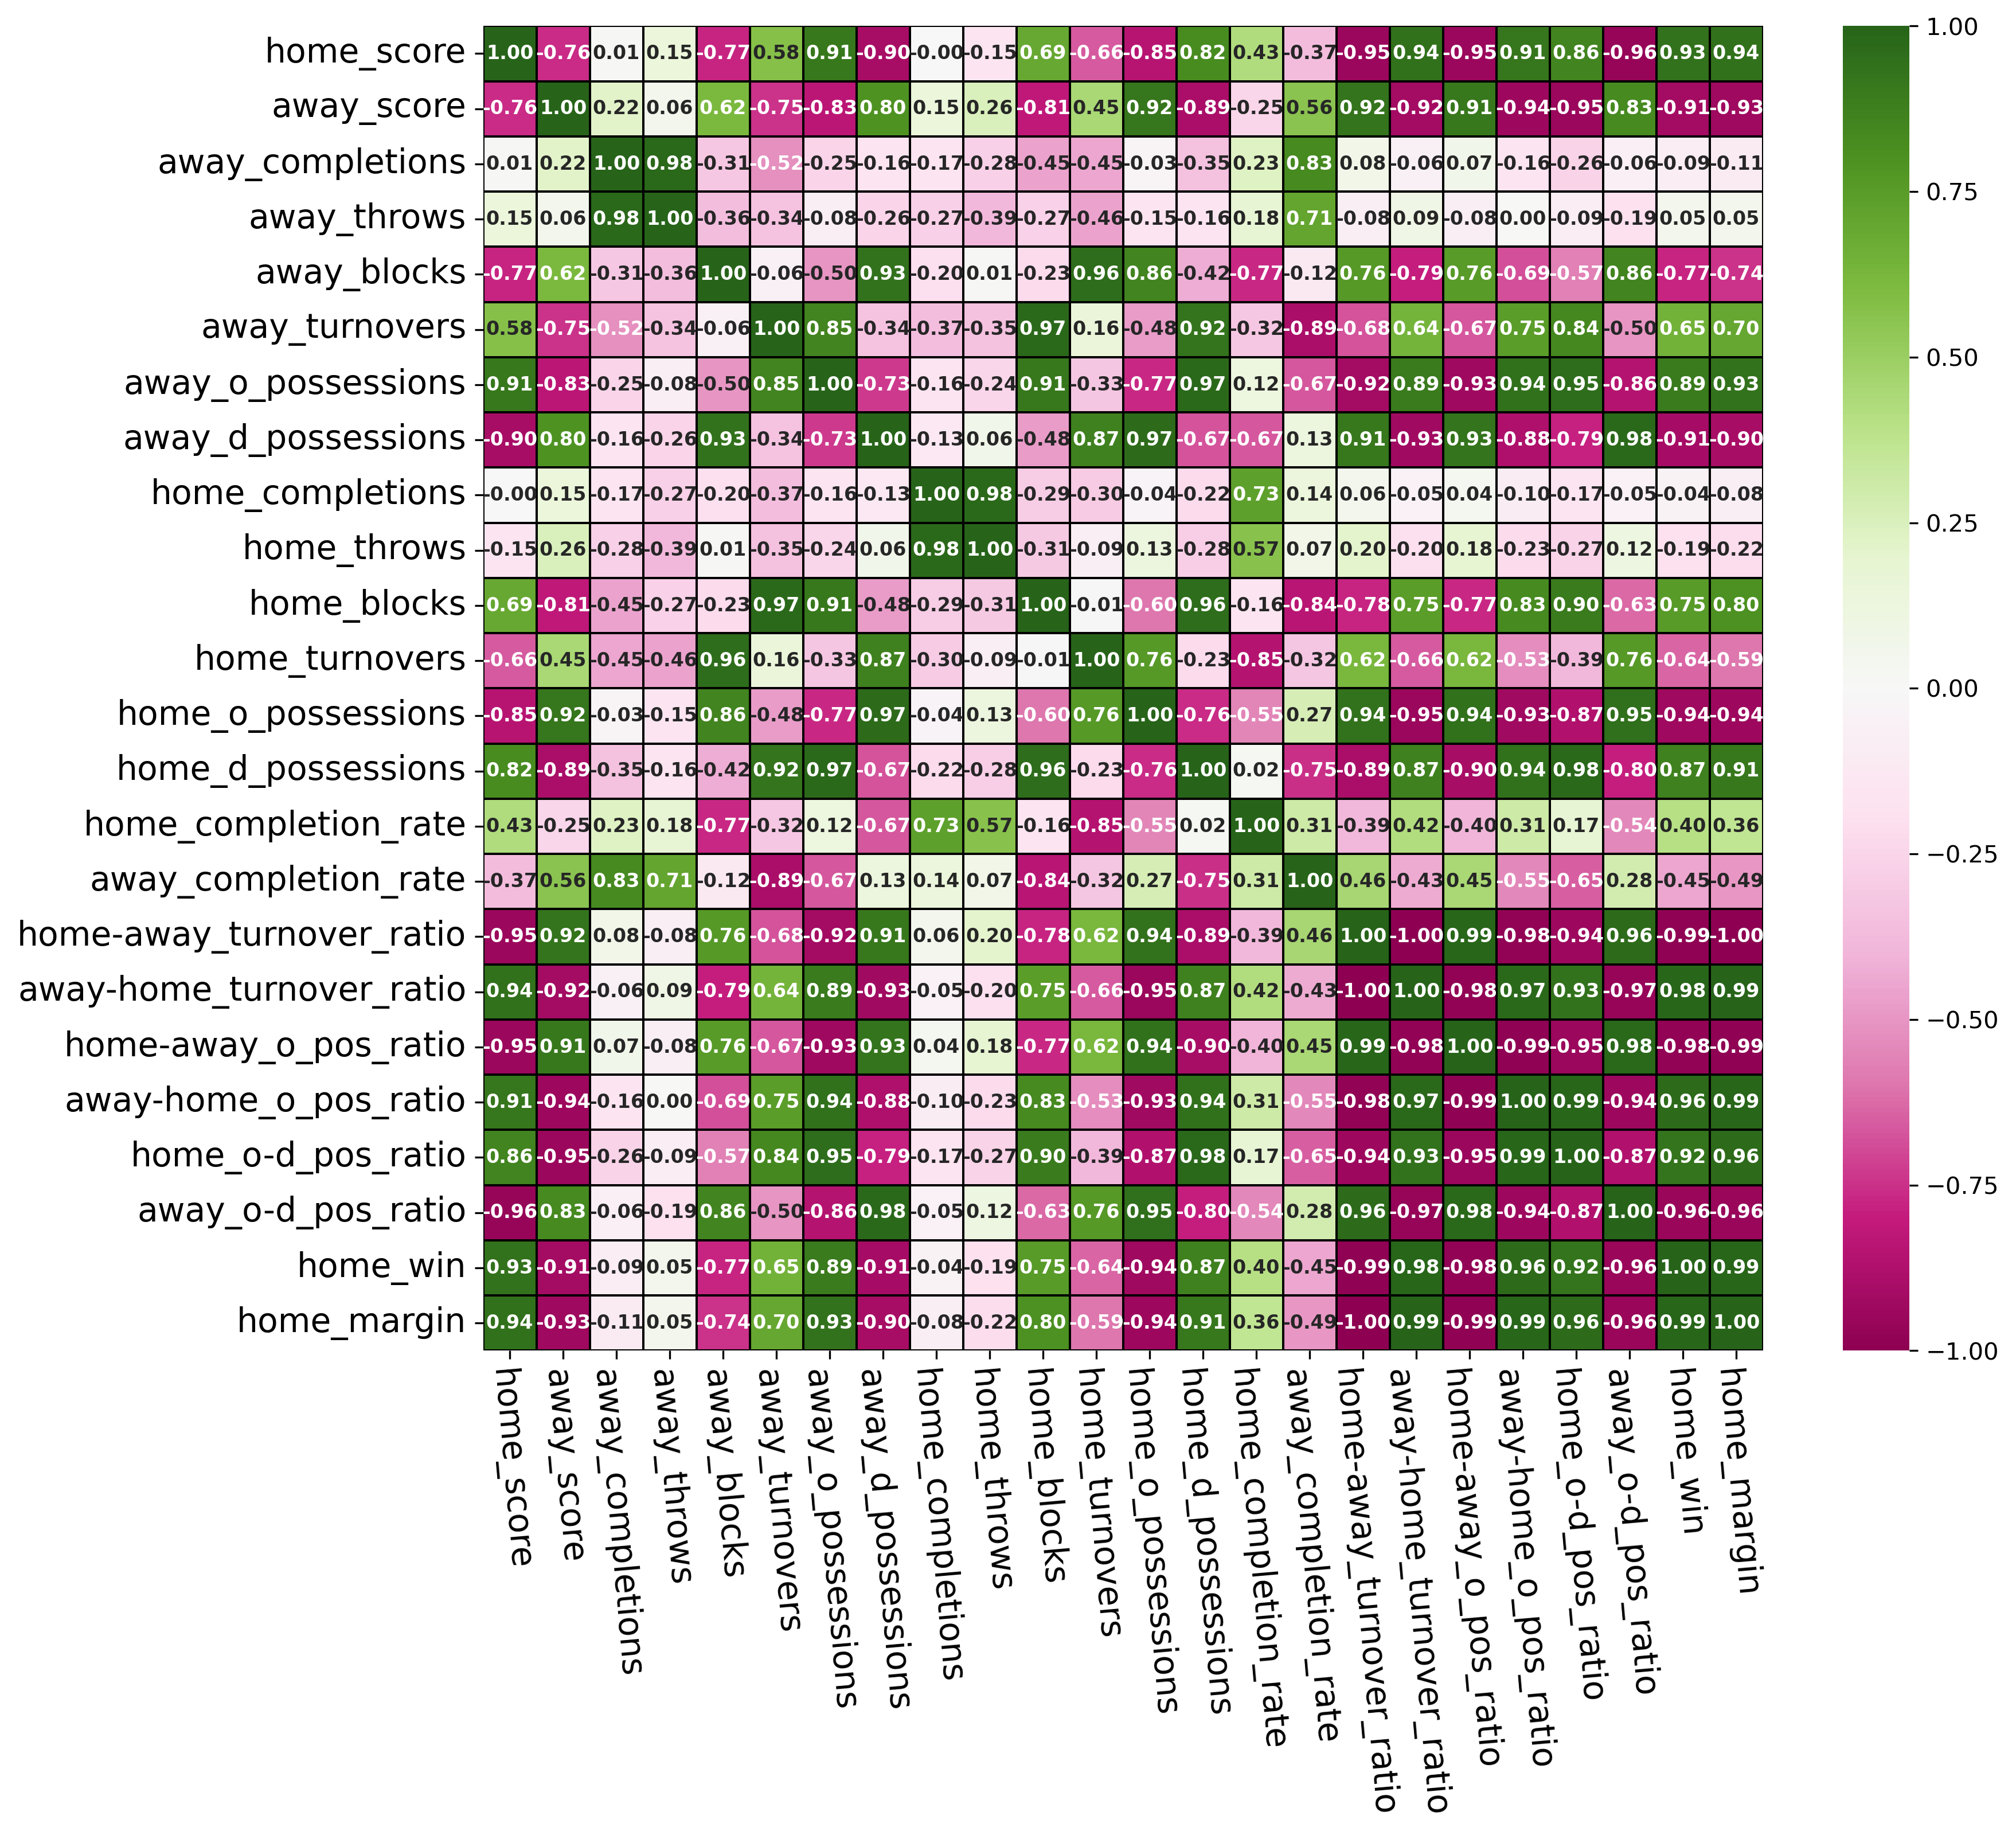

In [237]:
fig = plt.figure(figsize=(12,10), dpi=300)
sns.heatmap(data.corr(numeric_only=True).corr(), cmap='PiYG', linecolor='k', linewidths=0.5,
           vmin=-1, vmax=1,yticklabels=True, xticklabels=True,  fmt=".2f",
           annot=True, annot_kws=dict(fontsize=8,fontweight='bold'))
plt.tick_params(axis='x',labelrotation=-85)
plt.tick_params(axis='both',labelsize=14)

### Model with Engineered Features
*modest improvements*

*how would regression model perform with only home/away throws+completions+turnovers???*

In [26]:
# Correlation Table for target features
data.corr(numeric_only=True).iloc[-2:,2:-2].T.sort_values('home_margin').style\
        .background_gradient(cmap = 'PiYG', vmin=-1,vmax=1)\
        .format(formatter="{:.3f}")

In [29]:
data.columns[data.columns.str.endswith('possessions')]

Index([], dtype='object')

In [48]:
X = data.iloc[:,7:]
X.drop(columns=['home_win','home_margin'], inplace=True)
# X.drop(columns=data.columns[data.columns.str.endswith('possessions')], inplace=True)
X.drop(columns=['away-home_turnover_ratio', 'home-away_completion_rate_ratio'], inplace=True)
features = X.columns
margin = data.home_margin
win = data.home_win
X = StandardScaler().fit_transform(X)

margin_model = LinearRegression().fit(X,margin)
win_model = LogisticRegression().fit(X,win)

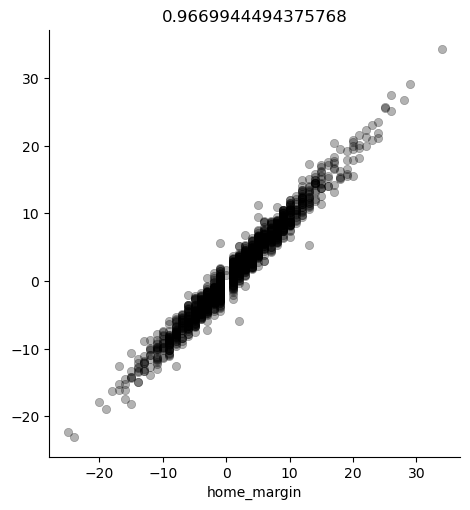

In [49]:
sns.relplot(x=margin, y=margin_model.predict(X), 
            edgecolor='face',alpha=0.3, color='k')
plt.title(margin_model.score(X,margin))
plt.show()

In [50]:
pd.DataFrame(np.abs(margin_model.coef_), index=features).sort_values(0, ascending=False).head(10)

0
home_completions          1.816114e+14
home_throws               1.798105e+14
away_completions          2.941943e+13
away_throws               2.858987e+13
home_turnovers            2.747610e+13
away_turnovers            4.603848e+12
home-away_turnover_ratio  4.117737e-01
away_blocks               3.208008e-01
home_blocks               3.085938e-01
away_completion_rate      6.835938e-02

In [51]:
pd.DataFrame(np.abs(win_model.coef_), columns=features).T.sort_values(0,ascending=False).head(10)

0
home-away_turnover_ratio         5.186909
away_turnovers                   2.788012
home_turnovers                   2.733954
away_blocks                      0.737444
home_blocks                      0.514471
away_completion_rate             0.374013
home_completions                 0.348715
away-home_completion_rate_ratio  0.280429
away_completions                 0.255518
away_throws                      0.186024

In [52]:
win_model.score(X,win)

0.961484593837535

In [39]:
data.columns

Index(['game', 'date', 'week', 'home', 'away', 'home_score', 'away_score',
       'away_completions', 'away_throws', 'away_blocks', 'away_turnovers',
       'home_completions', 'home_throws', 'home_blocks', 'home_turnovers',
       'home_completion_rate', 'away_completion_rate',
       'home-away_turnover_ratio', 'away-home_turnover_ratio',
       'home-away_completion_rate_ratio', 'away-home_completion_rate_ratio',
       'home_win', 'home_margin'],
      dtype='object')

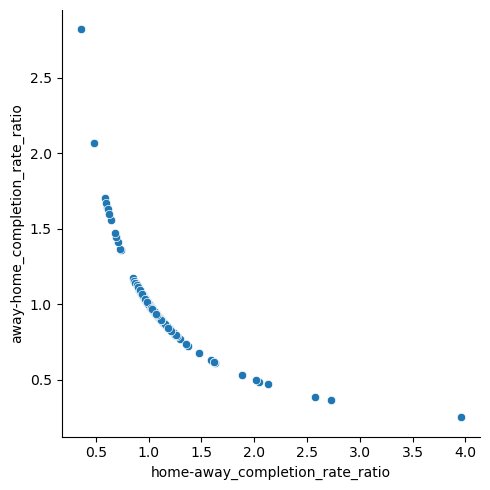

In [41]:
sns.relplot(data, x='home-away_completion_rate_ratio', y='away-home_completion_rate_ratio')
plt.show()

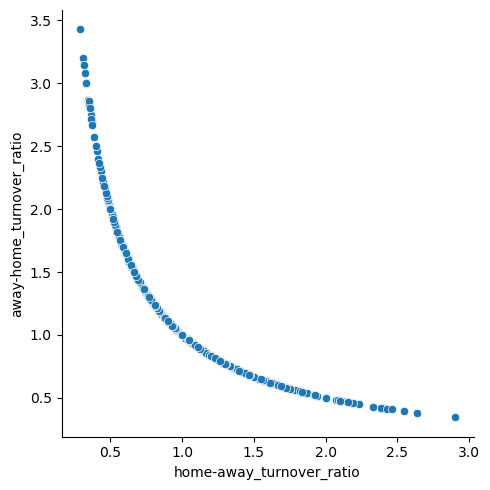

In [40]:
sns.relplot(data, x='home-away_turnover_ratio', y='away-home_turnover_ratio')
plt.show()

### Group by Teams
- given season stats, can season performance be predicted?
- group by date.dt.year, and team somehow?

In [301]:
print('are all unique home teams equal to all unique away teams?')
print(set(data.home.unique().tolist()) == set(data.away.unique().tolist()))

are all unique home teams equal to all unique away teams?
True


In [304]:
teams = data.home.unique().tolist()

In [305]:
years = data.date.dt.year.unique()

In [309]:
data.empty

False

In [313]:
team_stats = {}
for team in teams:
    team_stats[team] = {}
    for year in years:
        sub = data[(data.home == team) | (data.away == team)]
        sub = sub[sub.date.dt.year == year]
        if sub.empty:
            continue      
        team_stats[team].update({year:sub.index})

- iterate through gathered indices and record:
  - team/year index
  - games played, wins, losses
  - pts for, pts against
  - throws, completions, blocks, turnovers

In [316]:
data.loc[team_stats['Spiders'][2023]]

game                      date week      home      away  \
3067  2023-04-29-SEA-OAK 2023-04-29 14:00:00+00:00    1   Spiders  Cascades   
3100  2023-05-13-SLC-OAK 2023-05-13 17:00:00+00:00    3   Spiders     Shred   
3073  2023-05-19-OAK-POR 2023-05-19 19:30:00+00:00    4     Nitro   Spiders   
3074  2023-05-20-OAK-SEA 2023-05-20 17:00:00+00:00    4  Cascades   Spiders   
3102  2023-06-03-OAK-SLC 2023-06-03 19:00:00+00:00    6     Shred   Spiders   
3078  2023-06-04-OAK-COL 2023-06-04 17:00:00+00:00    6    Summit   Spiders   
3080   2023-06-10-SD-OAK 2023-06-10 17:00:00+00:00    7   Spiders  Growlers   
3082  2023-06-17-COL-OAK 2023-06-17 17:00:00+00:00    8   Spiders    Summit   
3089  2023-07-08-POR-OAK 2023-07-08 17:00:00+00:00   11   Spiders     Nitro   
3092   2023-07-15-LA-OAK 2023-07-15 17:00:00+00:00   12   Spiders  Aviators   
3110   2023-07-21-OAK-LA 2023-07-21 19:30:00+00:00   13  Aviators   Spiders   
3111   2023-07-22-OAK-SD 2023-07-22 18:15:00+00:00   13  Growlers   Spiders   

      home_score  away_score  away_completions  away_throws  away_blocks  ...  \
3067          24          23               231          254           10  ...   
3100          25          27               370          392           14  ...   
3073          23          24               261          277           12  ...   
3074          20          24               288          302           14  ...   
3102          21          17               200          224            8  ...   
3078          27          22               221          237            3  ...   
3080          21          17               199          224           10  ...   
3082          24          23               321          338            9  ...   
3089          25          10               238          283           16  ...   
3092          20          19               255          282           13  ...   
3110          24          23               246          258            8  ...   
3111          20          19               266          282            4  ...   

      home_completions  home_throws  home_blocks  home_turnovers  \
3067               338          360           13              22   
3100               258          281            9              23   
3073               250          269            9              19   
3074               225          243            6              18   
3102               242          263           10              21   
3078               248          258            8              10   
3080               189          212           10              23   
3082               225          242           10              17   
3089               203          233           14              30   
3092               297          327           15              30   
3110               246          258            6              12   
3111               218          233           10              15   

      home_o_scores  home_o_points  home_o_possessions  home_d_scores  \
3067             20             25                  32              4   
3100             21             29                  39              4   
3073             18             26                  31              5   
3074             15             26                  30              5   
3102             16             19                  28              5   
3078             19             23                  25              8   
3080             13             19                  21              8   
3082             16             25                  30              8   
3089              8             12                  19             14   
3092             12             22                  39              8   
3110             17             25                  27              7   
3111             15             20                  25              5   

      home_d_points  home_d_possessions  
3067             27                  15  
3100             27